In [41]:
extract_path='data set'

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [43]:
train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')

In [44]:

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [45]:
val_datagen = ImageDataGenerator(rescale=1.0/255)  # Validation data is only normalized

In [46]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

Found 9887 images belonging to 4 classes.


In [47]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1925 images belonging to 4 classes.


In [48]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model_checkpoint = ModelCheckpoint(
    'best_banana_model.weights.h5',  # Updated file extension
    save_best_only=True,
    save_weights_only=True,
    monitor='val_loss',
    mode='min'
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
#  Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5329 - loss: 1.0517

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


309/309 ━━━━━━━━━━━━━━━━━━━━ 1212s 4s/step - accuracy: 0.5334 - loss: 1.0508 - val_accuracy: 0.5377 - val_loss: 1.4462
Epoch 2/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1216s 4s/step - accuracy: 0.8866 - loss: 0.3262 - val_accuracy: 0.5029 - val_loss: 2.1272
Epoch 3/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1221s 4s/step - accuracy: 0.8967 - loss: 0.3052 - val_accuracy: 0.4026 - val_loss: 4.9795
Epoch 4/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1296s 4s/step - accuracy: 0.8926 - loss: 0.3061 - val_accuracy: 0.5730 - val_loss: 1.9146
Epoch 5/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1265s 4s/step - accuracy: 0.9345 - loss: 0.2010 - val_accuracy: 0.5564 - val_loss: 1.9196
Epoch 6/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1308s 4s/step - accuracy: 0.9368 - loss: 0.1644 - val_accuracy: 0.5995 - val_loss: 2.7920


In [16]:
model.save('final_banana_model.h5')

In [ ]:
#  Evaluate the Model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.5261 - loss: 1.5106
Validation Loss: 1.4461816549301147
Validation Accuracy: 0.5376623272895813


In [18]:
import matplotlib.pyplot as plt

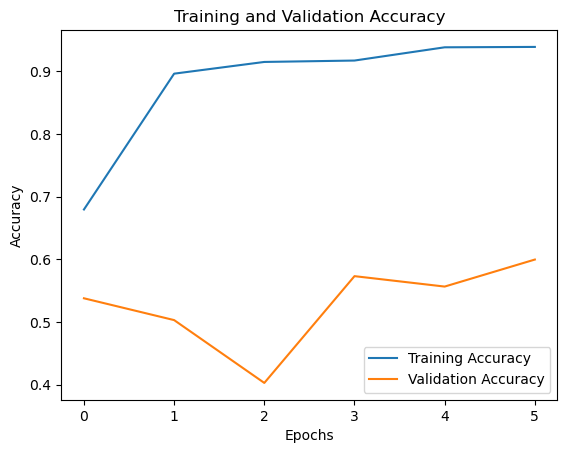

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

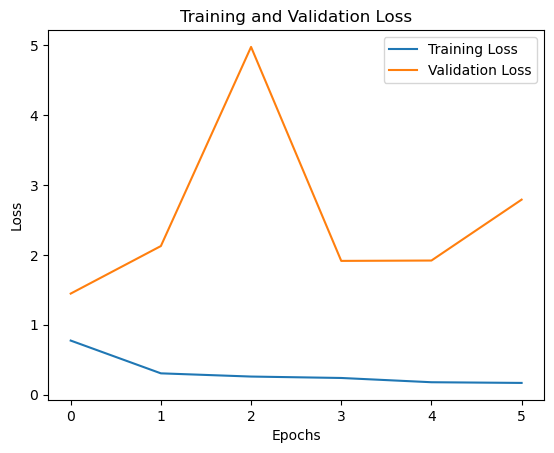

In [20]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [24]:
# Load the model
model = tf.keras.models.load_model('final_banana_model.h5')

In [39]:
# Load and preprocess a test image
img_path = 'test/1.jpeg'  # Update with test image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [40]:
# Predict the class
predictions = model.predict(img_array)
class_names = list(train_generator.class_indices.keys())
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted class: ambul_kesel_artificial
